In [1]:
import os, sys
# Setup your root path
package_path = '/Users/miguel.romero/Workspace/machine-learning-the-ninja-path'
os.chdir(package_path)
if package_path not in sys.path:
  sys.path.append(package_path)

# Regresion Lineal Simple
Este notebook es de propósito didáctico para mostrar el funcionamiento del algoritmo de la Regresión Lineal Simple y se han añadido algunos memes famosos de Los Simpsons para hacerlo más amigable.

Este notebook intenta explicar el paso a paso de una forma gráfica, haciendo uso del lenguaje python3.

## Setup

Simple setup to install the required dependencies

In [1]:
!pip3.11 install pandas numpy matplotlib scikit-learn


[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: pip install --upgrade pip


## Import libraries

- [Pandas](https://pandas.pydata.org/) is a fast, powerful, flexible and easy to use open source data analysis and manipulation tool, built on top of the Python programming language.
- [Numpy](https://numpy.org/doc/stable/) is the fundamental package for scientific computing in Python. It is a Python library that provides a multidimensional array object, various derived objects (such as masked arrays and matrices), and an assortment of routines for fast operations on arrays, including mathematical, logical, shape manipulation, sorting, selecting, I/O, discrete Fourier transforms, basic linear algebra, basic statistical operations, random simulation and much more.
- [Matplotlib](https://matplotlib.org/) is a comprehensive library for creating static, animated, and interactive visualizations in Python. Matplotlib makes easy things easy and hard things possible.

In [2]:
import matplotlib.pyplot as plt
from math_lib.functions import covariance, variance, mean, straight_line

# ¿Qué es la Regresión Linear Simple?

La regresión lineal simple es un **método estadístico** que se utiliza para modelar la relación entre una **_variable independiente_** (predictora) y una **_variable dependiente_** (respuesta) mediante **_una línea recta_**. En otras palabras, busca encontrar la mejor línea recta que represente la relación entre las dos variables.

El propósito principal de la regresión lineal simple es **_predecir_** o **_explicar_** el valor de una variable dependiente (respuesta) en función de una variable independiente (predictora). Por ejemplo, si queremos predecir el precio de una casa (variable dependiente) en función de su tamaño (variable independiente), podríamos utilizar la regresión lineal simple para encontrar la relación entre estas dos variables y así predecir el precio de una casa de un tamaño determinado.

Además de la predicción, la regresión lineal simple también se utiliza para comprender la relación entre las variables, identificar la fuerza y dirección de la relación, y evaluar la importancia de la variable predictora en la variable de respuesta. Esto se logra mediante la interpretación de los **_coeficientes de la regresión_**, como la **pendiente** y el **intercepto** de la línea.

![Más despacio cerebrito](../assets/simpsons_5.jpeg)

## Vamos por pasos, ¿Qué es una línea recta?


En álgebra lineal, una línea recta se define como un conjunto de puntos que siguen una relación lineal entre dos variables. Matemáticamente, una línea recta se puede expresar mediante una ecuación de la forma $y=mx+b$, donde $y$ representa la variable dependiente, $x$ representa la variable independiente, $m$ es la pendiente de la línea y $b$ es el término de intersección o corte con el eje $y$.

La **pendiente** $(m)$ de la línea recta indica la tasa de cambio entre las dos variables, es decir, cuánto cambia la variable dependiente por cada cambio unitario en la variable independiente. El término de **intersección** $(b)$ indica el valor de la variable dependiente cuando la variable independiente es cero.

En álgebra lineal, las líneas rectas son importantes porque pueden utilizarse para modelar y representar relaciones lineales entre variables en sistemas de ecuaciones lineales. También son fundamentales en la geometría analítica, donde se utilizan para representar y analizar las relaciones entre puntos en un plano cartesiano.

Además, las líneas rectas juegan un papel crucial en la regresión lineal, donde se utilizan para ajustar y modelar relaciones lineales entre variables en conjuntos de datos. La regresión lineal es una herramienta importante en estadística y ciencia de datos para predecir valores futuros, comprender las relaciones entre variables y tomar decisiones basadas en datos.

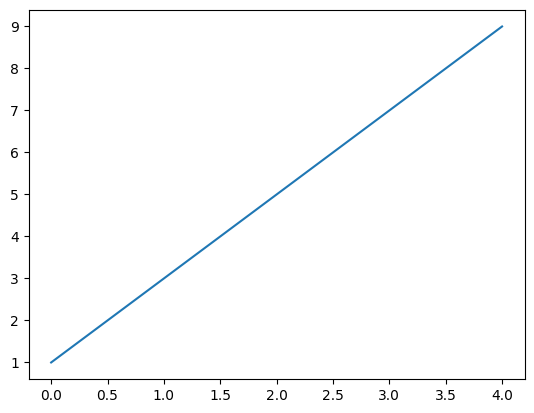

In [3]:
independent_values = [0,1,2,3,4]
plt.plot(independent_values, [straight_line(x, 2, 1) for x in independent_values])


En el ejemplo anterior tenemos a las variables independientes $x=\{0,1,2,3,4\}$ junto con el valor del interceptor $b=1$ y el valor de la pendiente $m=2$. Al pasarlas por nuestra ecuación de la recta obtenemos los valores para $y = \{1, 3, 5, 7, 9\}$

## Ecuación de la recta punto pendiente

La ecuación de la recta punto-pendiente es una forma común de expresar la ecuación de una línea recta en un plano cartesiano. Esta ecuación se utiliza cuando se conoce un punto específico en la línea y la pendiente de la línea. La forma general de la ecuación de la recta punto-pendiente es:

$$y - y_1 = m(x-x_1)$$

Donde:

- $(x_1,y_1)$ es el punto conocido en la línea.
- $m$ es la pendiente de la línea.

Para entender mejor esta ecuación, aquí tienes una explicación detallada paso a paso de cómo se deriva y cómo se usa:

**1. Conocer la definición de la pendiente (m):** La pendiente de una línea es la medida de la inclinación de la línea y se define como el cambio en $y$ dividido por el cambio en $x$. Matemáticamente, esto se expresa como:

$$m = \frac{y_2-y_1}{x_2-x_1}$$

**2. Usar el punto conocido en la línea $(x_1,y_1)$:** Ya que conocemos un punto específico en la línea, podemos usar sus coordenadas $(x_1,y_1)$ en la ecuación de la recta. Por lo tanto, la ecuación general se convierte en:

$$y - y_1 = m(x-x_1)$$

**3. Interpretar la ecuación:**
- $(x_1,y_1)$ representa las coordenadas del punto conocido en la línea.
- $m$ es la pendiente de la línea.

**4. Resolver la ecuación:** Una vez que conocemos el punto y la pendiente, podemos utilizar la ecuación para encontrar otros puntos en la línea o graficarla en un plano cartesiano.

**5. Representación gráfica:** La ecuación de la recta punto-pendiente describe una línea recta en un plano cartesiano. Dado que conocemos un punto en la línea y su pendiente, podemos usar esta información para trazar la línea en un gráfico.

En resumen, la ecuación de la recta punto-pendiente es una herramienta útil para describir una línea recta en un plano cartesiano cuando se conoce un punto específico en la línea y su pendiente. Es una forma conveniente de representar geométricamente una línea y calcular otros puntos en ella.

### Genial! Todo muy claro pero...

#### ¿Cómo se calcula la regresion lineal simple?

Ya vámos para allá, pero antes, pongamos un ejemplo:

Digamos que queremos modelar la relación entre las horas de estudio y las notas de los estudiantes de una universidad. Para esto contamos con la siguiente muestra de datos.

| Horas Estudio | Nota |
|--------------|------|
|      3       |   8  |
|      6       |  10  |
|      8       |  15  |
|      2       |   8  |
|      1       |   5  |
|      6       |  12  |

Para este problema identificamos como _variables independientes_ a las "Horas Estudio" y a nuestras _variables dependientes_ como las "Notas"

| Horas Estudio $(x)$ | Nota $(y)$ |
|--------------|------|
|      3       |   8  |
|      6       |  10  |
|      8       |  15  |
|      2       |   8  |
|      1       |   5  |
|      6       |  12  |

Veámoslo gráficamente:

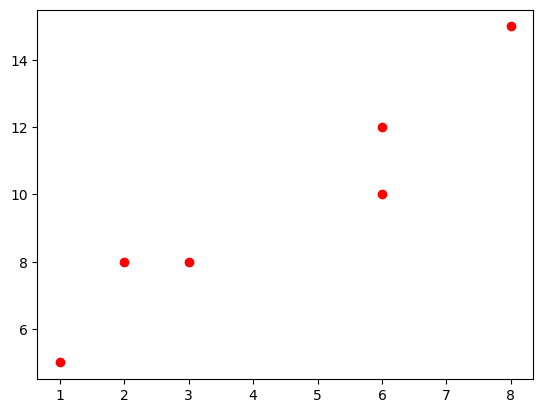

In [4]:
independent_values = [3,6,8,2,1,6]
dependent_values = [8,10,15,8,5,12]
plt.scatter(independent_values, dependent_values, color="red")

La importancia de apreciarlo gráficamente es que podemos ver que existe una **relación lineal directa**. Es decir que conforme la variable dependiente aumenta, vemos un incremento en la variable independiente

Ahora la pregunta es, ¿Existe algún modelo matemático que nos permita observar la relación entre las horas de estudio y las notas?. Bueno, con mucha imaginación uno podría decir que existe una línea recta que sigue esta tendencia y que pasa "relativamente" cerca por cada punto de nuestra relación.

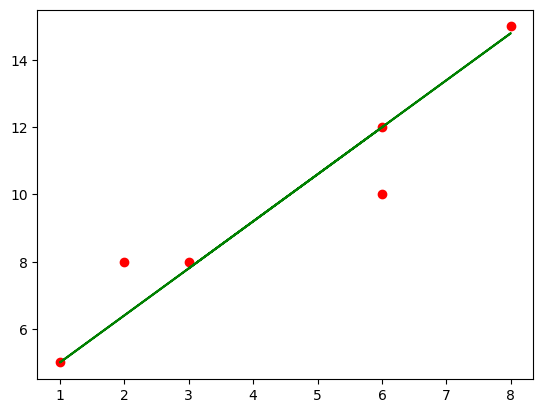

In [5]:
independent_values = [3,6,8,2,1,6]
dependent_values = [8,10,15,8,5,12]
plt.scatter(independent_values, dependent_values, color="red")
plt.plot(independent_values, [straight_line(x, 1.4, 3.6) for x in independent_values], color="green")

Claro que esta no es la única línea recta que se puede trazar en nuestra gráfica, entonces debemos preguntarnos ¿Cómo calculamos la línea recta que mejor se _aproxime_ a nuestros datos observados?

Una buena opción parece partir del punto medio para las variables $y$ y $x$.

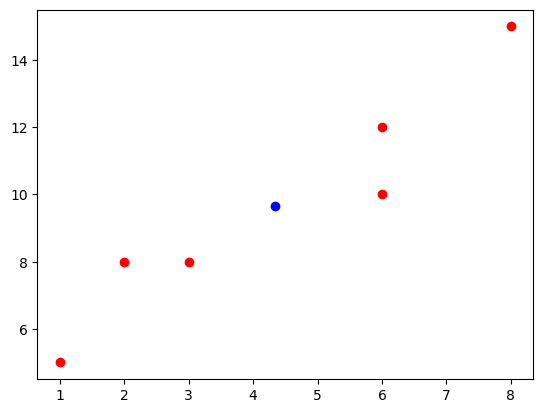

In [5]:
plt.scatter(independent_values, dependent_values, color="red")
plt.scatter(mean(independent_values), mean(dependent_values), color="blue")


Ahora que tengo un punto de mi recta puedo usar la ecuación de la recta punto-pendiente para terminar de calcular los puntos faltantes de mi línea de _regresión_. Recordermos que la ecuación de la recta punto-pendiente es:

$$y - y_i = m(x-x_i)$$

donde:

- $y_i = \bar{y}$
- $x_i = \bar{x}$
- $m = \frac{\sigma_{xy}}{\sigma_{x}^2}$

Sí vemos al modelo desde el punto de vista de $y$, tenemos la recta de regresión de $y$ sobre $x$ o de correlación de la $y$ sobre la $x$

$$ y - \bar{y} = \frac{\sigma_{xy}}{\sigma_{x}^2}(x-\bar{x})$$

Sí compactamos esta ecuación de la recta punto-pendiente a nuestra clásica ecuación de la recta, entonces tendríamos algo como:

$$ \hat{y} = b_0 + b_1 x $$

donde:

- $\hat{y}$ Es la $y$ calculada o **valor predicho** de $y$
- $b_0$ Es el **Intercepto** o punto que corta la $y$
- $b_1$ Es el **coeficiente de regresión** o **coeficiente correlación** de $y$ sobre $x$, que representa la pendiente de la línea de regresión.

Y tenemos que ya solo es cosa de encontrar a $b_0$ y a $b_1$. Quienes por equivalencias algebraicas son:

- $b_0 = y - b_1 x$
- $b_1 = \frac{\sigma_{xy}}{\sigma_x^2}$


5.6 5.566666666666666
4.593333333333332 5.6400000000000015
(1.0059101654846359, 0.8144208037825055)


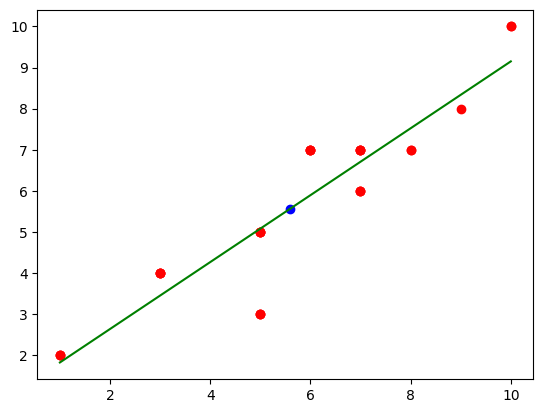

In [6]:
independent_values = [1,1,1,3,3,3,3,5,5,5,5,5,5,5,6,6,6,6,7,7,7,7,7,7,7,8,8,9,10,10]
dependent_values =   [2,2,2,4,4,4,4,3,3,3,5,5,5,5,7,7,7,7,6,6,6,7,7,7,7,7,7,8,10,10]

mean_independent = mean(independent_values)
mean_dependent = mean(dependent_values)
covariant_xy = covariance(independent_values, dependent_values)
variance_x = variance(independent_values, mean_independent)

print(mean_independent, mean_dependent)
print(covariant_xy, variance_x)

b1 = covariant_xy / variance_x
b0 = mean_dependent - b1 * mean_independent

print((b0, b1))

plt.scatter(independent_values, dependent_values, color="red")
plt.scatter(mean(independent_values), mean(dependent_values), color="blue")
plt.plot(independent_values, [straight_line(x, b1, b0) for x in independent_values], color="green")


5.608695652173913 5.391304347826087
5.848771266540641 7.281663516068053
(0.8862928348909671, 0.8032191069574245)


5.705607476635514

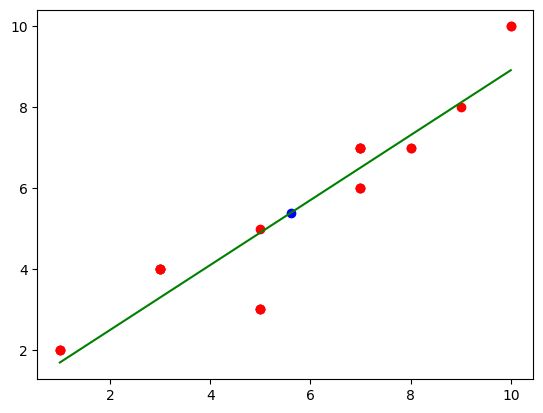

In [9]:
independent_values = [1,1,1,3,3,3,3,5,5,5,5,7,7,7,7,7,7,7,8,8,9,10,10]
dependent_values =   [2,2,2,4,4,4,4,3,3,3,5,6,6,6,7,7,7,7,7,7,8,10,10]

mean_independent = mean(independent_values)
mean_dependent = mean(dependent_values)
covariant_xy = covariance(independent_values, dependent_values)
variance_x = variance(independent_values, mean_independent)

print(mean_independent, mean_dependent)
print(covariant_xy, variance_x)

b1 = covariant_xy / variance_x
b0 = mean_dependent - b1 * mean_independent

print((b0, b1))

plt.scatter(independent_values, dependent_values, color="red")
plt.scatter(mean(independent_values), mean(dependent_values), color="blue")
plt.plot(independent_values, [straight_line(x, b1, b0) for x in independent_values], color="green")
straight_line(6, b1, b0)

![Esto se esta poniendo feo](../assets/simpsons_3.jpeg)

## Break mental

¿Mucha información hasta ahora? 

No te preocupes tomate un tiempo para digerir y entender los conceptos planteados, te aseguro que todo hará sentido al final.

![Toda la noche estudiando](../assets/simpsons_4.jpeg)

# Bibliografía
- Regresión Lineal y Mínimos cuadrados https://www.youtube.com/watch?v=k964_uNn3l0&t=322s
- Playlist sobre Machine Learning https://www.youtube.com/playlist?list=PL-Ogd76BhmcC_E2RjgIIJZd1DQdYHcVf0
- Minimos cuádraticos https://www.youtube.com/watch?v=AGoRbs97rDM
- 

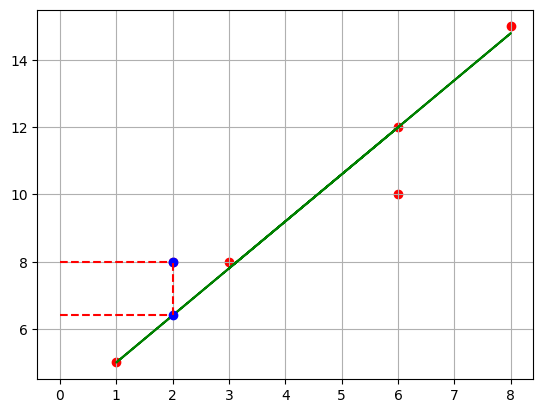

In [7]:
independent_values = [3,6,8,2,1,6]
dependent_values = [8,10,15,8,5,12]
straight_line_model = [straight_line(x, 1.4, 3.6) for x in independent_values]

plt.scatter(independent_values, dependent_values, color="red")
plt.plot(independent_values, straight_line_model, color="green")

x =independent_values[3]
y = straight_line_model[3]

plt.plot([0,x], [y, y], 'r--')
plt.plot(x, y, 'bo')

x =independent_values[3]
y = dependent_values[3]

plt.plot([0,x], [y, y], 'r--')
plt.plot(x, y, 'bo')

x =independent_values[3]
y = dependent_values[3]
y_calc = straight_line_model[3]

plt.plot([x, x], [y_calc, y], 'r--')

plt.grid(True)